Using TensorFlow backend.


(50000, 28, 28) (50000,)


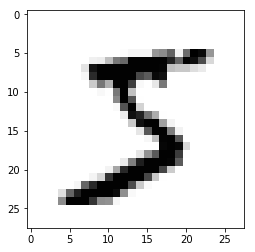

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [2]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [3]:
import tensorflow as tf

In [10]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def myNN(x):
    
    
    '''
    input: x, a tnesor of shape (N_example, 784)
    output: y, a tensor of shape (N_example, N_class), keep_prob
    '''
    
    with tf.name_scope('fc1'):
        w_fc1 = weight_variable([784, 512])
        b_fc1 = bias_variable([512])
        h_fc1 = tf.nn.relu(tf.matmul(x, w_fc1)+b_fc1)
    with tf.name_scope('dropout2'):
        keep_prob = tf.placeholder(tf.float32)
        h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
    with tf.name_scope('fc2'):
        w_fc2 = weight_variable([512, 256])
        b_fc2 = bias_variable([256])
        h_fc2 = tf.nn.relu(tf.matmul(h_fc1_drop, w_fc2)+b_fc2)
    with tf.name_scope('dropout'):
        h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)
    with tf.name_scope('fc3'):
        w_fc3 = weight_variable([256, 256])
        b_fc3 = bias_variable([256])
        h_fc3 = tf.nn.sigmoid(tf.matmul(h_fc2_drop, w_fc3)+b_fc3)
    with tf.name_scope('fc4'):
        w_fc4 = weight_variable([256, 10])
        b_fc4 = bias_variable([10])
        y = tf.nn.sigmoid(tf.matmul(h_fc3, w_fc4)+b_fc4)
        
    return y, keep_prob

def main():
    x = tf.placeholder(tf.float32, [None, 784])
    y_ = tf.placeholder(tf.int64, [None])
    
    y, keep_prob = myNN(x)
    
    with tf.name_scope('loss'):
        cross_entropy = tf.losses.sparse_softmax_cross_entropy(labels=y_, logits=y)
        cross_entropy = tf.reduce_mean(cross_entropy)
    
    with tf.name_scope('adam_optimizer'):
        optimizer = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
        
    with tf.name_scope('accuracy'):
        correct_prediction = tf.equal(tf.argmax(y, 1), y_)
        correct_prediction = tf.cast(correct_prediction, tf.float32)
        accuracy = tf.reduce_mean(correct_prediction)
    
    
    with tf.Session() as sess:
        
        sess.run(tf.global_variables_initializer())
        
        
        train_loss=[]
        test_loss=[]
        batch_size = 1000
        n_epoch = 200
        for epoch in range(1, n_epoch+1):
            #print("epoch: ", epoch)
            for i in range(0, 50000, batch_size):
                sess.run(optimizer, feed_dict={x: X_train[i:i+batch_size, :], y_: y_train[i:i+batch_size], keep_prob:0.5})
            train_loss.append(cross_entropy.eval({x: X_train, y_: y_train, keep_prob:1}))
            test_loss.append(cross_entropy.eval({x: X_test, y_: y_test, keep_prob:1}))
            
            if epoch%10 == 0:
                print("Cost after " + str(epoch)+ " epoch: " + str(train_loss[-1]))
                
        index = list(range(1, n_epoch+1))
        plt.plot(index, train_loss, label='Train')
        plt.plot(index, test_loss, label='Test')
        plt.xlabel('number of iterations')
        plt.ylabel('loss')
        plt.show()
        
        train_acc = accuracy.eval({x: X_train, y_: y_train, keep_prob:1})
        test_acc = accuracy.eval({x: X_test, y_: y_test, keep_prob:1})
        
        print("Train Accuracy Score:", train_acc)
        print("Test Accuracy Score:", test_acc) 

        

In [ ]:
main()

Cost after 10 epoch: 1.60612
Cost after 20 epoch: 1.53637
Cost after 30 epoch: 1.51287
Cost after 40 epoch: 1.50099
Cost after 50 epoch: 1.49329
Cost after 60 epoch: 1.48772
Cost after 70 epoch: 1.48343
Cost after 80 epoch: 1.48027
Cost after 90 epoch: 1.47752
Cost after 100 epoch: 1.47538
Cost after 110 epoch: 1.47376
Cost after 120 epoch: 1.47223
Cost after 130 epoch: 1.47109
Cost after 140 epoch: 1.47014
Cost after 150 epoch: 1.46927
Cost after 160 epoch: 1.46849
Cost after 170 epoch: 1.46778
Cost after 180 epoch: 1.46719
